In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import regex as re

In [22]:
cit_df = pd.read_csv('alldata.csv')
cit_df = cit_df[~cit_df['State_name'].isna()] # Small cleaning adjustment
cit_df["State_name"] = [state.lower() for state in cit_df["State_name"]] # State names lowercase

In [30]:
for tablename in os.listdir('./citizen_data/'):
    if tablename == '.DS_Store':
        continue
    tablename = tablename.replace('_citizenData.csv','')
    tablename = tablename.lower()
    print(tablename)

nct of delhi
telangana
andhra pradesh
goa
uttarakhand
haryana
chandigarh
andaman and nicobar
sikkim
madhya pradesh
jharkhand
himachal pradesh
chhattisgarh
delhi
bihar
punjab
andaman and nicobar islands
dadra and nagar haveli
assam
kerala
puducherry
rajasthan
gujarat
lakshadweep
arunachal pradesh
jammu and kashmir
uttar pradesh
manipur
meghalaya
west bengal
karnataka
tamil nadu
nagaland
tripura
maharashtra
odisha


In [46]:
# cit_states contains each state that appears in the citizen database
cit_states = []
"""for state in np.sort(cit_df['State_name'].unique()):
    state = state.lower()
    cit_states.append(state)"""
# ref_states contains each state that appears in the reference database
for tablename in os.listdir('./citizen_data/'):
    if tablename == '.DS_Store':
        continue
    tablename = tablename.replace('_citizenData.csv','')
    tablename = tablename.lower()
    cit_states.append(tablename)
ref_states = []
for tablename in os.listdir('./reference_data/'):
    if tablename == '.DS_Store':
        continue
    tablename = tablename.replace('pvt_','')
    tablename = tablename.replace('.csv','')
    tablename = tablename.replace('_',' ')
    tablename = tablename.lower()
    ref_states.append(tablename)

In [47]:
(set(cit_states) & set(ref_states)) == set(ref_states) 
# Every state in the reference database is in citizen database
# Join databases on ref_states.

True

In [ ]:
# andaman and nicobar -> andaman and nicobar islands
# nct of delhi -> delhi
# ref_states missing chandigarh, chhattisgarh, dadra and nagar haveli, goa, punjab, sikkim, telangana, uttar pradesh, uttarakhand, and west bengal

In [119]:
# Combining Andaman and Nicobar Islands and Andaman and Nicobar citizen csv files
aani_df = pd.read_csv("citizen_data/Andaman and Nicobar Islands_citizenData.csv")
aan_df = pd.read_csv("citizen_data/Andaman and Nicobar_citizenData.csv")
pd.concat([aan_df, aani_df],ignore_index=True).to_csv('citizen_data/Andaman and Nicobar Islands_citizenData.csv',index=False)

In [121]:
# Combining Delhi and NCT of Delhi citizen csv files
nct_delhi_df = pd.read_csv("citizen_data/NCT of Delhi_citizenData.csv")
delhi_df = pd.read_csv("citizen_data/Delhi_citizenData.csv")
pd.concat([delhi_df, nct_delhi_df],ignore_index=True).to_csv('citizen_data/Delhi_citizenData.csv')

In [141]:
cit_filenames = []
for ref_filename in os.listdir('./reference_data/'):
    if ref_filename == '.DS_Store':
        continue
    cit_filename = ref_filename.replace('pvt_','')
    cit_filename = cit_filename.replace('_', ' ')
    cit_filename = cit_filename.replace('.csv', '_citizenData.csv')
    cit_filenames.append(cit_filename)
#os.listdir('./reference_data/')[0].replace('pvt_','').replace('_', ' ').replace('.csv', '_citizenData.csv')

In [142]:
ref_filenames = os.listdir('./reference_data/')
if '.DS_Store' in ref_filenames:
    ref_filenames.remove('.DS_Store')
ref_filenames.sort()
cit_filenames.sort()

In [151]:
pd.DataFrame(data=zip(ref_filenames,cit_filenames), columns=['reference_filename', 'citizen_filename']).to_csv('db_filenames.csv')

In [58]:
ref_df = pd.read_csv("reference_data/pvt_andaman_and_nicobar_islands.csv")
cit_df = pd.read_csv("citizen_data/Andaman and Nicobar Islands_citizenData.csv")

In [ ]:
for state in cit_df['State_name'].unique():
    state_cit_df = cit_df[cit_df['State_name'] == state]
    state_ref_df = 
    plt.plot(state_cit_df['week'], )

In [2]:
all_df = pd.read_csv("updated_alldata.csv")

In [3]:
kerala_df = pd.read_csv("citizen_data/kerala_citizenData.csv")

In [176]:
jack = kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']

In [185]:
jack.columns

Index(['Date_of_observation', 'Species_name', 'Leaves_fresh', 'Leaves_mature',
       'Leaves_old', 'Flowers_bud', 'Flowers_open', 'Flowers_male',
       'Flowers_Female', 'Fruits_unripe', 'Fruits_ripe', 'Fruits_open', 'Year',
       'Week'],
      dtype='object')

In [178]:
jack['Week']

153751     2
153752    32
153753    43
153754     7
153755    28
          ..
233482    43
233483    22
233484    23
233485    24
233486     0
Name: Week, Length: 79736, dtype: int64

In [8]:
kerala_df['Species_name'].value_counts().index

Index(['Jackfruit- Artocarpus heterophyllus',
       'Mango (all varieties)- Mangifera indica', 'Teak- Tectona grandis',
       'Tamarind- Tamarindus indica', 'Indian laburnum- Cassia fistula',
       'Amla- Phyllanthus emblica', 'Jamun- Syzygium cumini',
       'Coconut palm-Cocos nucifera', 'Maulsari- Mimusops elengi',
       'Purple bauhinia- Bauhinia purpurea',
       ...
       'Guh-de- Three-leaf caper tree-Crateva adansonii',
       'White willow-Salix alba', 'Prunus nepalensis-Sohiong',
       'Prosopis cineraria-Khejri', 'Broken Bones Tree-Oroxylum indicum',
       'Olour Mango- Mangifera indica', 'Meethabhaji-Champereia manillana ',
       'Chinar-Platanus orientalis', 'Bhimal-Grewia optiva',
       'Himalayan rhododendron- Rhododendron arboreum'],
      dtype='object', name='Species_name', length=169)

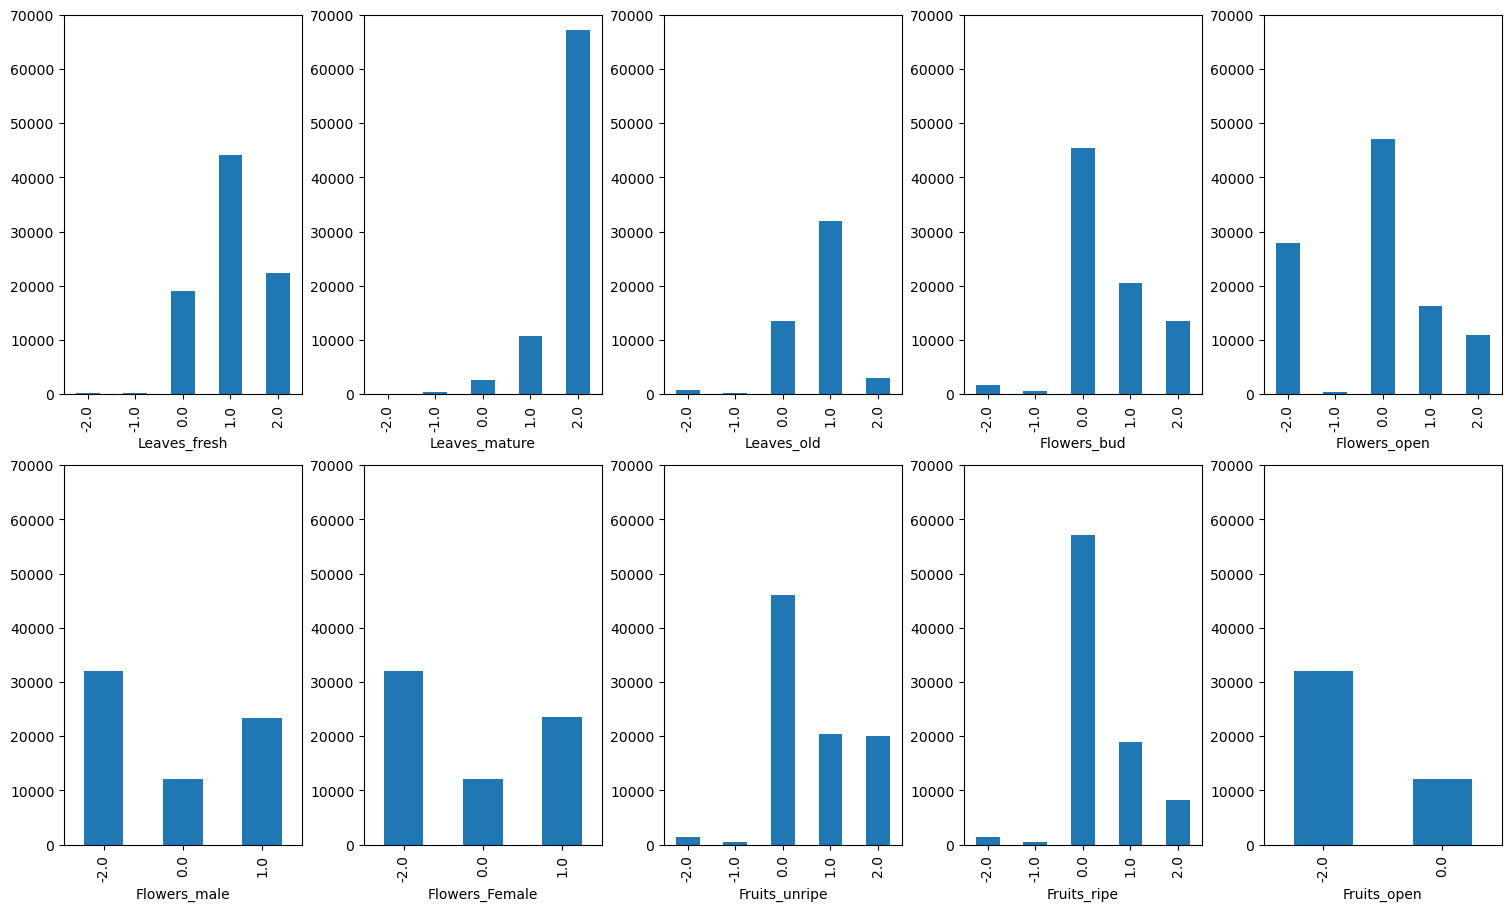

In [39]:
# TODO: Adjust Sizes and Spacing
fig, ax = plt.subplots(2, 5, constrained_layout=True, figsize=(15, 9))
for species in kerala_df['Species_name'].value_counts().index[:2]:
    for idx, col in enumerate(kerala_df.columns[2:-2]):
        plt.subplot(2, 5, idx+1)
        plt.ylim(0,70000)
        kerala_df[kerala_df['Species_name'] == species][col].value_counts().sort_index().plot.bar()

plt.show()

In [12]:
kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']['Leaves_fresh'].value_counts().sort_index()

Leaves_fresh
-2.0      136
-1.0      209
 0.0    12958
 1.0    44109
 2.0    22323
Name: count, dtype: int64

<AxesSubplot:xlabel='Leaves_fresh'>

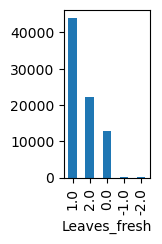

In [10]:
# Test
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']['Leaves_fresh'].value_counts().plot.bar()
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Tamarind- Tamarindus indica']['Leaves_fresh'].value_counts().plot.bar()

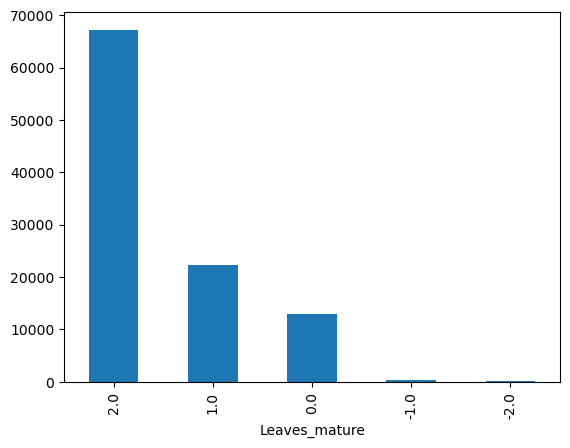

In [196]:
fig, ax = plt.subplots()
jack['Leaves_fresh'].value_counts().plot.bar()
jack['Leaves_mature'].value_counts().plot.bar()


In [184]:
pd.concat(
    [
        jack['Leaves_fresh'].value_counts().rename('average'), 
        df.min().rename('min'), 
        df.max().rename('max')
    ],
    axis=1,
)

,average,min,max
views,53.666667,3,135
orders,208.000000,1,500


<AxesSubplot:>

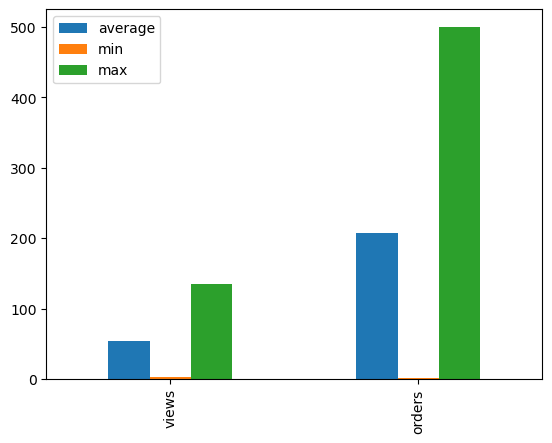

In [179]:
import pandas as pd

groups = [[23,135,3], [123,500,1]]
group_labels = ['views', 'orders']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [
        df.mean().rename('average'), 
        df.min().rename('min'), 
        df.max().rename('max')
    ],
    axis=1,
).plot.bar()